In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from pathlib import Path

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import NMF
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform


pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [19]:
imagepath = Path('../images/')
datapath = Path('../data')
full = 'cleaned_full_1.csv'
survey = 'features_not_scaled.csv'

In [20]:
df = pd.read_csv(datapath/survey)

In [21]:
df.head()

,moa1#1_1,moa1#1_2,moa1#1_3,moa1#1_4,moa1#1_5,moa1#1_6,moa1#1_7,moa1#1_8,moa1#1_9,moa1#1_10,moa1#2_1,moa1#2_2,moa1#2_3,moa1#2_4,moa1#2_5,moa1#2_6,moa1#2_7,moa1#2_8,moa1#2_9,moa1#2_10,moa2#1_1,moa2#1_2,moa2#1_3,moa2#1_4,moa2#1_5,moa2#1_6,moa2#1_7,moa2#1_8,moa2#1_9,moa2#1_10,moa2#2_1,moa2#2_2,moa2#2_3,moa2#2_4,moa2#2_5,moa2#2_6,moa2#2_7,moa2#2_8,moa2#2_9,moa2#2_10,moa_adult,idea_1,idea_2,idea_3,idea_4,idea_5,idea_6,idea_7,idea_8,swb_1,swb_2,swb_3,swb_4,swb_5,swb_6,mindful_1,mindful_2,mindful_3,mindful_4,mindful_5,mindful_6,mindful_7,mindful_8,mindful_9,mindful_10,mindful_11,mindful_12,mindful_13,mindful_14,mindful_15,belong_1,belong_2,belong_3,belong_4,belong_5,belong_6,belong_7,belong_8,belong_9,belong_10,belong_now,efficacy_1,efficacy_2,efficacy_3,efficacy_4,efficacy_5,efficacy_6,efficacy_7,efficacy_8,efficacy_9,efficacy_10,support_1,support_2,support_3,support_4,support_5,support_6,support_7,support_8,support_9,support_10,support_11,support_12,transgres_freq,transgres_common,transgres_1,transgres_2,transgres_3,transgres_4,exploit_1,exploit_2,exploit_3,stress_1,stress_2,stress_3,stress_4,stress_5,stress_6,stress_7,stress_8,stress_9,stress_10,marriage1_1,marriage1_2,marriage1_3,marriage1_4,marriage2,marriage4
0,4.0,4.0,3.0,2.0,2.0,3.0,2.0,1.0,4.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,2.0,2.0,1.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,6.0,5.0,5.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,7.0,4.0,6.0,5.0,6.0,6.0,7.0,7.0,7.0,4.0,6.0,7.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,5.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,10.0,25.0,30.0,35.0,2.0,1.0
1,4.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0,4.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,5.0,2.0,3.0,1.0,5.0,4.0,4.0,2.0,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,7.0,7.0,7.0,6.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,4.0,4.0,4.0,3.0,2.0,1.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,10.0,25.0,35.0,30.0,3.0,1.0
2,4.0,4.0,4.0,1.0,1.0,4.0,2.0,3.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,2.0,5.0,3.0,2.0,1.0,1.0,1.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,3.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,6.0,6.0,5.0,2.0,7.0,5.0,5.0,3.0,6.0,6.0,5.0,6.0,6.0,5.0,3.0,1.0,4.0,1.0,5.0,5.0,3.0,4.0,4.0,5.0,2.0,1.0,5.0,2.0,2.0,4.0,4.0,1.0,1.0,59.0,39.0,2.0,1.0
3,4.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,4.0,2.0,2.0,4.0,3.0,2.0,4.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,6.0,6.0,5.0,6.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,4.0,3.0,4.0,1.0,5.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0,3.0,2.0,4.0,2.0,3.0,4.0,3.0,6.0,6.0,7.0,3.0,7.0,6.0,5.0,4.0,6.0,6.0,6.0,5.0,3.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,4.0,3.0,4.0,5.0,4.0,2.0,2.0,2.0,0.0,0.0,60.0,40.0,1.0,1.0
4,4.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,3.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,3.0,1.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,1.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,5.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,7.0,5.0,6.0,6.0,5.0,6.0,7.0,6.0,7.0,6.0,5.0,6.0,2.0,2.0,1.0,1.0,1.0,1.0,6.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,30.0,40.0,10.0,20.0,4.0,2.0


In [22]:
# This will be used when grabbing verbose descriptions of columns
# In other words, the text of the questions
label_df = pd.read_csv('../data/labels_lower.csv')
label_df.tail(2)

,Variable Name,Question text,Survey Question ID
326,response_bias_sum,Sum of all Bias Dummy Variables,ADDED
327,school_coded,Cleaned Names of Schools Attended,ADDED


In [23]:
def get_question_text(colname, label_df=label_df):
    '''Get column description'''
    
    cond = label_df['Variable Name'] == colname
    idx = label_df.index[cond].tolist()[0]
    text = label_df.iloc[idx]['Question text']
    
    return text

In [24]:
get_question_text('demo_parents')

'My biological parents (or parents who raised me most of my life)...'

In [25]:
# Lists of individual sections
# df = pd.read_csv('../data/cleaned_full_1.csv')

moa = [c for c in df.columns if 'moa' in c]
idea = [c for c in df.columns if 'idea' in c]
swb = [c for c in df.columns if 'swb' in c]
mindful = [c for c in df.columns if 'mindful' in c]
belong = [c for c in df.columns if 'belong' in c]
efficacy = [c for c in df.columns if 'efficacy' in c]
support = [c for c in df.columns if 'support' in c]
transgres = [c for c in df.columns if 'transgres' in c]
exploit = [c for c in df.columns if 'exploit' in c]
stress = [c for c in df.columns if 'stress' in c]
marriage = [c for c in df.columns if 'marriage' in c]

# Held out for demographics
socmedia = [c for c in df.columns if 'socmedia' in c]
usdream = [c for c in df.columns if 'usdream' in c]
demo = [c for c in df.columns if 'demo' in c]
disability = [c for c in df.columns if 'disability' in c]
phys = [c for c in df.columns if 'phys' in c]

In [8]:
# From lecture

def make_dendrogram(dataframe, linkage_method, metric, color_threshold=None):
    '''
    This function creates and plots the dendrogram created by hierarchical clustering.
    
    INPUTS: Pandas Dataframe, string, string, int
    
    OUTPUTS: None
    '''
    distxy = squareform(pdist(dataframe.values, metric=metric))
    Z = linkage(distxy, linkage_method)
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=12.,  # font size for the x axis labels
        labels = dataframe.index,
        color_threshold = color_threshold
    )
    plt.show()

In [28]:
def nmf_results(df, n_topics=5, top_ques=5, per_person=3, verbose=False): 
    
    X = MinMaxScaler().fit_transform(df)  
    # Fit NMF to X
    nmf = NMF(n_components=n_topics, random_state=0,
              alpha=.3, l1_ratio=.5).fit(X)

    # W matrix maps each row (person) from input matrix to topic vector -> shape(m, n_topics)
    W = nmf.transform(X)

    # For each row/person, grab the column indices with highest values
    top_n_per_person = W.argsort()[:,-per_person:][:,::-1]

    # topics is the H matrix, mapping each topic to feature (question) -> shape (n_topics, p)
    topics = nmf.components_
    
    topic_questions = []
    
    for i, topic in enumerate(topics):
        topidxs = np.argsort(topic)[::-1][:top_ques]
        toplist = [(round(topic[i], 2), colname, get_question_text(colname)) 
                   for i, colname in zip(topidxs, df.columns[topidxs])]
        to_string = ['{} -> {} -> {}'.format(*tup) for tup in toplist]
        topques = '\n'.join(to_string)
        topic_questions.append(toplist)
        if verbose:
            print(f'*****Topic: {i}*****\n**Top Questions:\n{topques}\n')
        
    return nmf, W, topic_questions, top_n_per_person

In [46]:
nmf, W, topic_questions, top_n_per_person = nmf_results(df, n_topics=7, top_ques=10, 
                                                        per_person=3, verbose=True)

*****Topic: 0*****
**Top Questions:
3.01 -> efficacy_7 -> I can remain calm when facing difficulties because I can rely on my coping abilities.
2.99 -> swb_6 -> I have high self-esteem.
2.89 -> efficacy_4 -> I am confident that I could deal efficiently with unexpected events.
2.83 -> efficacy_10 -> I can usually handle whatever comes my way.
2.81 -> belong_1 -> If other people don't seem to accept me, I don't let it bother me.
2.76 -> swb_3 -> I am satisfied with my life.
2.71 -> efficacy_5 -> Thanks to my resourcefulness, I know how to handle unforeseen situations.
2.67 -> stress_4 -> ... felt confident about your ability to handle your personal problems?
2.62 -> efficacy_6 -> I can solve most problems if I invest the necessary effort.
2.62 -> moa2#2_1 -> Make independent decisions

*****Topic: 1*****
**Top Questions:
2.94 -> stress_2 -> ...felt that you were unable to control the important things in your life?
2.93 -> stress_3 -> ... felt nervous and "stressed"?
2.75 -> stress_10 -> 

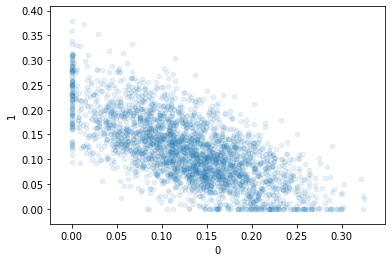

In [60]:
two_of_seven_topics = pd.DataFrame(W)
ax = two_of_seven_topics.plot(x=0, y=1, kind='scatter', alpha=0.1)

In [11]:
# # This cell will plot the number of students that end up associated with each topic
# # as the number of topics increases

# n=6

# fig, axes = plt.subplots(2, int(n/2), figsize=(19,14))

# for ax, num in zip(axes.flatten(), range(3,3+n)):
#     nmf, topic_questions, top_n_per_person = nmf_results(df, n_topics=num)
#     vals, counts = np.unique(top_n_per_person[:,0], return_counts=True)
#     plot_df = pd.DataFrame(counts, vals)
#     ax = plot_df.sort_values(0, ascending=False).plot(kind='bar', legend=False, ax=ax)
#     ax.set_title(f'Number of topics: {num}')
#     ax.set_ylabel('Number of students')

# # plt.suptitle('Students per topic over increasing number of topics', fontsize=20)
# plt.tight_layout()
# # fig.savefig('../images/Students per topic over increasing number of topics.png')

In [14]:
full_df = pd.read_csv('../data/cleaned_full_1.csv')

In [15]:
def sub_dfs_by_topic(full_df, W, top_people=100):

    topic_dfs = []

    for i, topic in enumerate(W.T):
        topidxs = np.argsort(topic)[::-1][:top_people]
        topic_amt = [round(topic[idx], 2) for idx in topidxs]

        sub_df = full_df.iloc[topidxs].copy()
        sub_df.insert(0, 'topic_amt', topic_amt)
        sub_df.insert(0, 'topic', i)

        topic_dfs.append(sub_df)
    
    return topic_dfs

In [16]:
topic_dfs = sub_dfs_by_topic(full_df, W, top_people=200)

In [17]:
topic_dfs[0].head()

,topic,topic_amt,duration_min,finished,moa1#1_1,moa1#1_2,moa1#1_3,moa1#1_4,moa1#1_5,moa1#1_6,moa1#1_7,moa1#1_8,moa1#1_9,moa1#1_10,moa1#2_1,moa1#2_2,moa1#2_3,moa1#2_4,moa1#2_5,moa1#2_6,moa1#2_7,moa1#2_8,moa1#2_9,moa1#2_10,moa2#1_1,moa2#1_2,moa2#1_3,moa2#1_4,moa2#1_5,moa2#1_6,moa2#1_7,moa2#1_8,moa2#1_9,moa2#1_10,moa2#2_1,moa2#2_2,moa2#2_3,moa2#2_4,moa2#2_5,moa2#2_6,moa2#2_7,moa2#2_8,moa2#2_9,moa2#2_10,moa_adult,moa_imp_biascheck,moa_ach_biascheck,moa_imp_dummy,moa-ach_dummy,moa_duration,idea_1,idea_2,idea_3,idea_4,idea_5,idea_6,idea_7,idea_8,idea-biascheck,idea-bias-dummy,idea_duration,demo_politics,demo_party,swb_1,swb_2,swb_3,swb_4,swb_5,swb_6,swb_target,swb_duration,mindful_1,mindful_2,mindful_3,mindful_4,mindful_5,mindful_6,mindful_7,mindful_8,mindful_9,mindful_10,mindful_11,mindful_12,mindful_13,mindful_14,mindful_15,mindful_biascheck,mindful_bias_dummy,mindful_duration,belong_1,belong_2,belong_3,belong_4,belong_5,belong_6,belong_7,belong_8,belong_9,belong_10,belong_now,belong_biascheck,belong_bias_dummy,belong_duration,efficacy_1,efficacy_2,efficacy_3,efficacy_4,efficacy_5,efficacy_6,efficacy_7,efficacy_8,efficacy_9,efficacy_10,efficacy_target,efficacy_biascheck,efficacy_bias_dummy,efficacy_duration,support_1,support_2,support_3,support_4,support_5,support_6,support_7,support_8,support_9,support_10,support_11,support_12,support_biascheck,support_bias_dummy,support_duration,socmedia_1,socmedia_2,socmedia_3,socmedia_4,socmedia_5,socmedia_6,socmedia_7,socmedia_8,socmedia_9,socmedia_10,socmedia_11,socmedia_biascheck,socmedia_bias_dummy,socmedia_duration,usdream_1,usdream_2,usdream_duration,transgres_freq,transgres_common,transgres_1,transgres_2,transgres_3,transgres_4,transgres_duration,exploit_1,exploit_2,exploit_3,exploit_duration,disability11,disability14_1,disability14_2,disability14_3,disability14_4,disability14_5,disability10_1,disability10_2,disability10_3,disability10_4,disability10_5,disability10_6,disability10_7,disability10_8,disability10_9,disability10_10,disability10_11,disability10_12,disability10_13,disability10_14,disability10_15,disability_duration,physsx_1,physsx_2,physsx_3,physsx_4,physsx_5,physsx_6,physsx_7,physsx_8,physsx_9,physsx_10,physsx_11,physsx_12,physsx_13,phys_target,physsx_biascheck,physsx_bias_dummy,phys_duration,stress_1,stress_2,stress_3,stress_4,stress_5,stress_6,stress_7,stress_8,stress_9,stress_10,stress_target,stress_biascheck,stress_bias_dummy,stress_duration,marriage1_1,marriage1_2,marriage1_3,marriage1_4,marriage2,marriage4,demo_parents0,demo_parents1,demo_parents2,demo_parents3,demo_parents4,marriage_duration,demo_sex,demo_age,demo_edu,demo_sibs1,demo_sibs2,demo_sibs3,demo_sibs4,demo_sibs5,demo_sibs6,demo_sibs7,demo_race,demo_mil,demo_mil_years,demo_income,demo_us,demo_us_years,demo_state,demo_duration,response_bias_sum
1927,0,1.55,32.233333,0,4.0,4.0,4.0,1.0,1.0,3.0,2.0,2.0,4.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,4.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,2.0,3.0,63,38,0,0,2.84,4.0,4.0,1.0,2.0,4.0,4.0,4.0,4.0,27,0,0.79,2.0,8.0,5.0,6.0,6.0,5.0,3.0,7.0,high,0.47,3.0,6.0,3.0,1.0,2.0,6.0,3.0,3.0,5.0,3.0,5.0,4.0,3.0,4.0,3.0,54,0,2.23,5.0,1.0,5.0,3.0,1.0,1.0,5.0,1.0,1.0,1.0,3.0,27,0,1.72,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,very_high,38,0,2.08,4.0,4.0,7.0,7.0,4.0,4.0,6.0,6.0,4.0,7.0,7.0,4.0,64,0,0.96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11,1,0.16,3.0,4.0,0.16,1.0,2.0,1.0,1.0,1.0,1.0,0.08,6.0,6.0,3.0,1.89,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,none,13,1,0.27,1.0,1.0,2.0,3.0,5.0,1.0,3.0,5.0,1.0,1.0,med,23,0,1.71,0.0,0.0,70.0,30.0,1.0,2.0,0,0,1,0,0,0.99,2.0,23-25,2.0,0,1,0,1,0,1,0,3,0.0,0,4.0,0.0,0,0.0,0.00,2
347,0,1.50,27.533333,0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,3.0,2.0,1.0,2.0,59,41,0,0,2.62,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,32,1,

In [61]:
df = pd.read_csv(datapath/survey)

nmf, W, topic_questions, top_n_per_person = nmf_results(df, n_topics=2, top_ques=20, 
                                                        per_person=3, verbose=True)

*****Topic: 0*****
**Top Questions:
2.4 -> swb_3 -> I am satisfied with my life.
2.38 -> swb_6 -> I have high self-esteem.
2.38 -> moa2#2_4 -> Accept responsibility for your actions
2.31 -> moa2#1_4 -> Accept responsibility for your actions
2.3 -> efficacy_7 -> I can remain calm when facing difficulties because I can rely on my coping abilities.
2.27 -> belong_now -> I feel like I belong.
2.27 -> support_4 -> I get the emotional help and support I need from my family.
2.27 -> support_3 -> My family really tries to help me.
2.26 -> efficacy_6 -> I can solve most problems if I invest the necessary effort.
2.25 -> moa2#1_6 -> Avoid drunk driving
2.24 -> efficacy_4 -> I am confident that I could deal efficiently with unexpected events.
2.24 -> moa2#1_1 -> Make independent decisions
2.24 -> moa2#2_1 -> Make independent decisions
2.24 -> efficacy_10 -> I can usually handle whatever comes my way.
2.24 -> mindful_12 -> I drive places on â€˜automatic pilotâ€™ and then wonder why I went there.
2

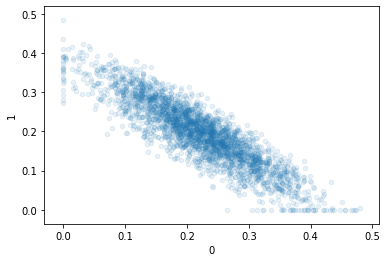

In [44]:
two_topics = pd.DataFrame(W)
ax = two_topics.plot(x=0, y=1, kind='scatter', alpha=0.1)

In [45]:
# This normalizes each row of W to percentages
W = nmf.transform(df)

normed = W / W.sum(axis=1)[:,None]
normed[:3]

array([[0.13351306, 0.04652532, 0.        , 0.20695447, 0.12220738,
        0.10247161, 0.21651126, 0.1718169 ],
       [0.01975802, 0.0980982 , 0.        , 0.23430764, 0.10778733,
        0.05405833, 0.30760646, 0.17838403],
       [0.        , 0.2497246 , 0.        , 0.21327242, 0.00692145,
        0.10449432, 0.40076685, 0.02482037]])

In [46]:
col_idx = np.arange(W.shape[0])[:,None]

# These are the percentages associated with the top indices
top_perc_per_person = normed[col_idx, top_n_per_person]
top_perc_per_person[:3]

array([[0.13351306, 0.04652532, 0.20695447],
       [0.0980982 , 0.01975802, 0.30760646],
       [0.2497246 , 0.40076685, 0.21327242]])

## Dendograms

/anaconda3/envs/eammi/lib/python3.7/site-packages/ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


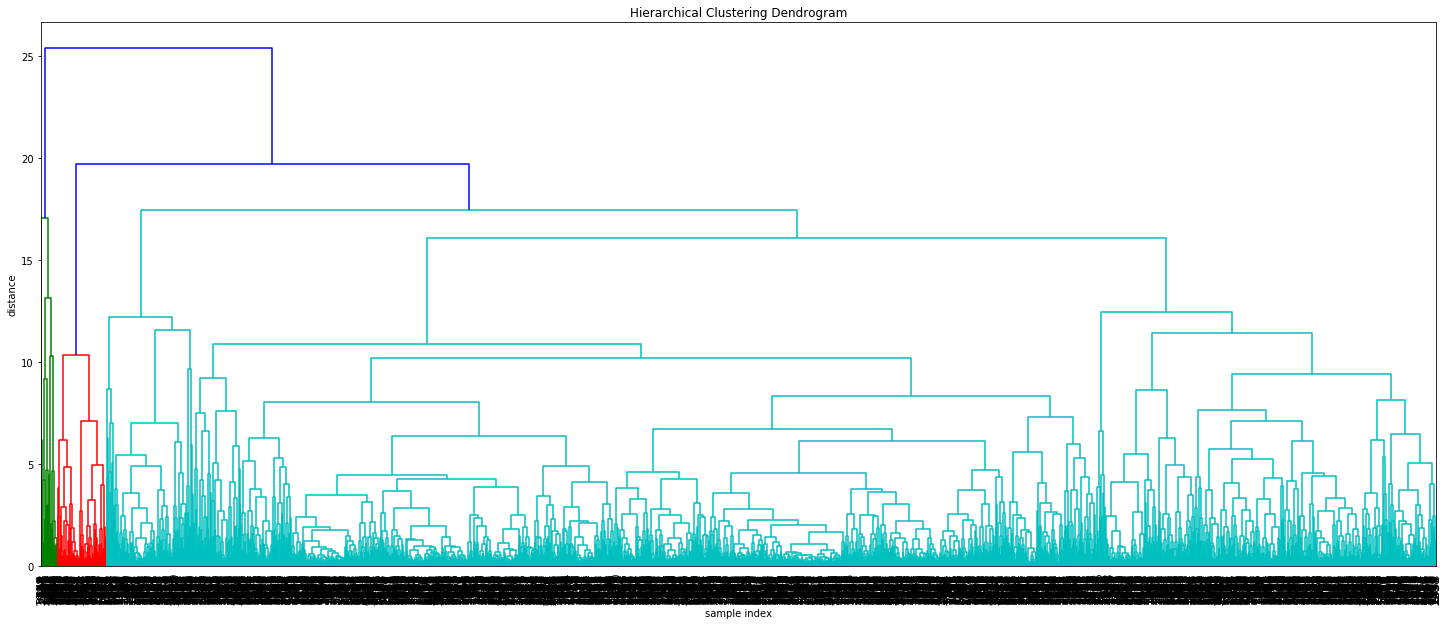

In [16]:
linktype = 'complete'
metric = 'cosine'
make_dendrogram(df, linktype, metric, color_threshold=None)

Text(0.5, 1.0, 'Hierarchical Clustering - Dendogram')

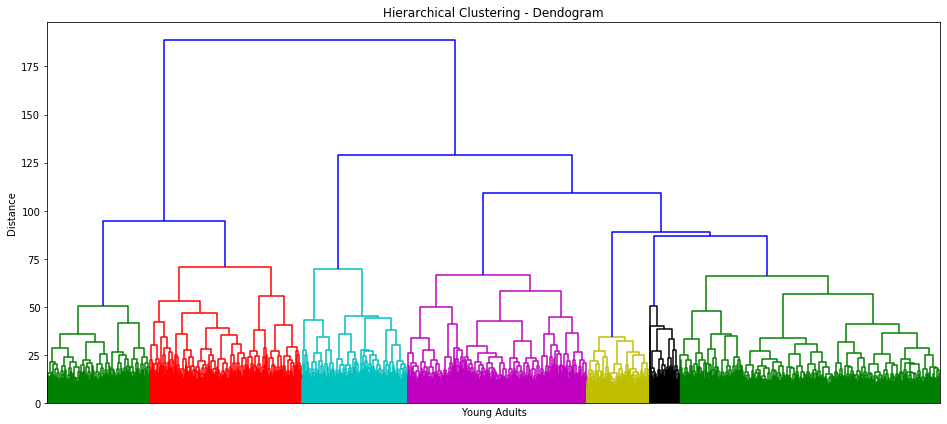

In [33]:
X = StandardScaler(with_mean = False).fit_transform(df)
Z = linkage(X, method='ward')

fig, ax = plt.subplots(figsize=(16,7))
dn = dendrogram(Z, color_threshold=75, no_labels=True, ax=ax)
ax.set_ylabel('Distance')
ax.set_xlabel('Young Adults')
ax.set_title('Hierarchical Clustering - Dendogram')
# plt.savefig('../images/dendogram_w_colors.png')

In [38]:
# Based on the dendogram, I can separate the data into n clusters
labels = fcluster(Z, 7, criterion='maxclust')

In [43]:
np.unique(labels, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([323, 484, 333, 568, 199,  94, 825]))